In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
file_path = r'C:\Users\cyuck\Downloads\DATA ANALYSIS\WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(file_path)

Previewing the first few rows of data

In [3]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
df.drop('customerID', axis=1, inplace=True)

Summary statistics for numeric features. Here, I noticed TotalCharges is missing so it is not a numeric type as of right now

In [5]:
print(df.describe())


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [6]:
print(df.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


TotalCharges is an object when it should be a numeric type so I will fix that

In [7]:
print(df.dtypes)


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [8]:
print(df.shape)


(7043, 20)


Changing TotalCharges to numeric type

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

TotalCharges has 11 null values because they are new customers. These rows will be dropped

In [10]:
print(df.isnull().sum())



gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [11]:
null_total_charges = df[df['TotalCharges'].isnull()]
print(null_total_charges)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 N

In [12]:
df = df.dropna(subset=['TotalCharges'])

In [13]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Churn doesn't seem to differ that much between genders

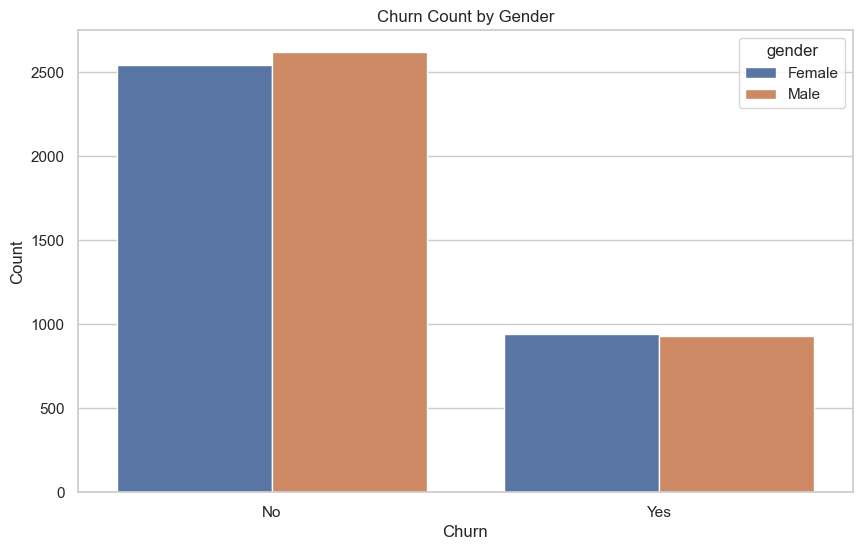

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(x='Churn', hue='gender', data=df)

plt.title('Churn Count by Gender')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.show()

A lot more Fiber optic users are churning compared to DSL or No internet service

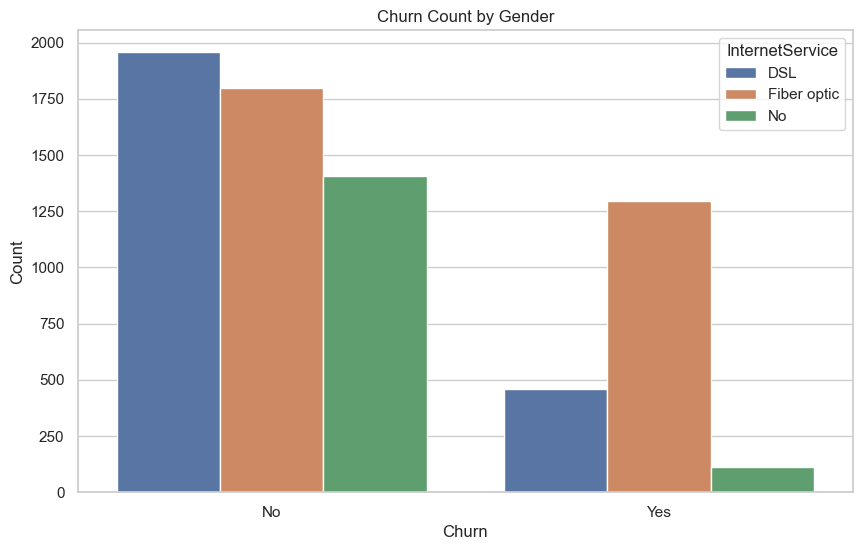

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(x='Churn', hue='InternetService', data=df)

plt.title('Churn Count by Gender')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.show()

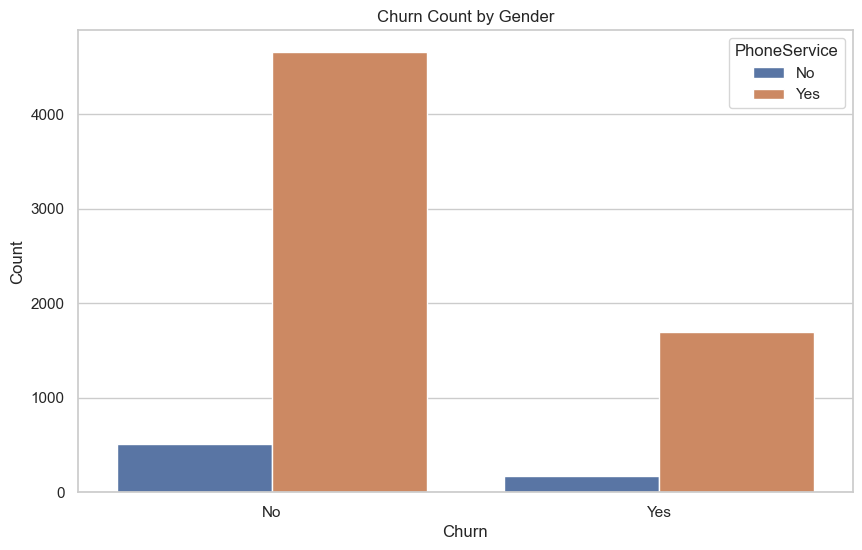

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(x='Churn', hue='PhoneService', data=df)

plt.title('Churn Count by Gender')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.show()

Numeric columns need to be scaled because of difference in value range

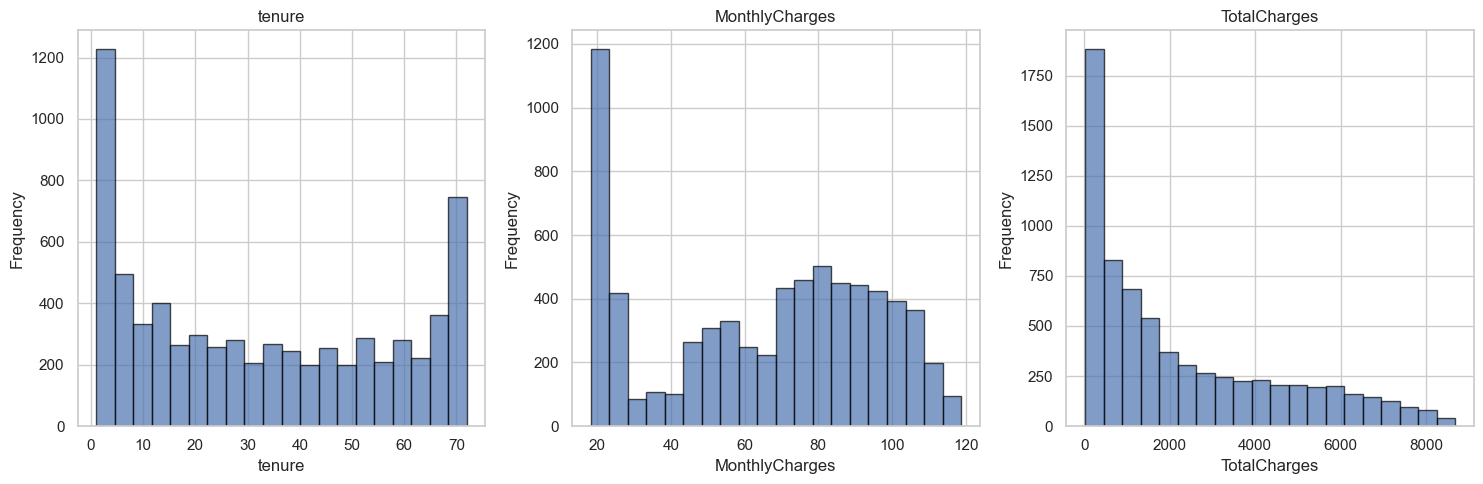

In [17]:
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Setting up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(15, 5))

# Plotting histograms for each numerical column
for i, column in enumerate(numeric_columns):
    axes[i].hist(df[column], bins=20, edgecolor='black', alpha=0.7)
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [18]:
# Separating features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Label encoding the target variable 'Churn'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining columns to label encode
label_encode_features = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 
                          'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                          'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

# Label encoding specified features
for feature in label_encode_features:
    label_encoder = LabelEncoder()
    X_train[feature] = label_encoder.fit_transform(X_train[feature])
    X_test[feature] = label_encoder.transform(X_test[feature])

# Preprocessing steps (one-hot encoding for categorical, standard scaling for numerical)
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']  
categorical_features = ['gender', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod'] + label_encode_features

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Defining models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Iterating through models
for model_name, model in models.items():
    # Creating a pipeline with preprocessing and the current model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Training the model
    pipeline.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")

    # Additional metrics and classification report
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")

Logistic Regression Accuracy: 0.79
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407





C:\Users\cyuck\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Accuracy: 0.76
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1033
           1       0.55      0.54      0.55       374

    accuracy                           0.76      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.76      0.76      1407



SVM Accuracy: 0.79
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



Random Forest Accuracy: 0.77
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.60      0.46      0.52       374

    accuracy        

Hyperparameter Tuning

In [19]:
# Defining logistic regression pipeline with higher max_iter
logistic_regression_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))  # Adjust max_iter as needed
])

# Defining hyperparameter grid for logistic regression
logistic_regression_param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2']
}

# Performing grid search
logistic_regression_grid_search = GridSearchCV(logistic_regression_pipeline, logistic_regression_param_grid, cv=5, scoring='accuracy', error_score='raise')
logistic_regression_grid_search.fit(X_train, y_train)

# Getting the best model
best_logistic_regression_model = logistic_regression_grid_search.best_estimator_

# Evaluating on the test set
y_pred_logistic_regression = best_logistic_regression_model.predict(X_test)

# Evaluating accuracy
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
print(f"Best Logistic Regression Model Accuracy: {accuracy_logistic_regression:.2f}")

# Classification Report (Precision, Recall, F1 Score)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic_regression))

Best Logistic Regression Model Accuracy: 0.79
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [24]:
# Defining KNN pipeline
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Defining hyperparameter grid for KNN
knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]
}

# Performing grid search
knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=5, scoring='accuracy', error_score='raise')
knn_grid_search.fit(X_train, y_train)

# Getting the best model
best_knn_model = knn_grid_search.best_estimator_

# Evaluating on the test set
y_pred_knn = best_knn_model.predict(X_test)

# Evaluating accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Best KNN Model Accuracy: {accuracy_knn:.2f}")

# Classification Report (Precision, Recall, F1 Score)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

C:\Users\cyuck\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\cyuck\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best KNN Model Accuracy: 0.76
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1033
           1       0.55      0.54      0.54       374

    accuracy                           0.76      1407
   macro avg       0.69      0.69      0.69      1407
weighted avg       0.76      0.76      0.76      1407



C:\Users\cyuck\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [25]:
# Defining SVM pipeline
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])

# Defining hyperparameter grid for SVM
svm_param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}

# Performing grid search
svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, scoring='accuracy', error_score='raise')
svm_grid_search.fit(X_train, y_train)

# Getting the best model
best_svm_model = svm_grid_search.best_estimator_

# Evaluating on the test set
y_pred_svm = best_svm_model.predict(X_test)

# Evaluating accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Best SVM Model Accuracy: {accuracy_svm:.2f}")

# Classification Report (Precision, Recall, F1 Score)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

Best SVM Model Accuracy: 0.79
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [26]:
# Defining Random Forest pipeline
random_forest_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Defining hyperparameter grid for Random Forest
random_forest_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Performing grid search
random_forest_grid_search = GridSearchCV(random_forest_pipeline, random_forest_param_grid, cv=5, scoring='accuracy', error_score='raise')
random_forest_grid_search.fit(X_train, y_train)

# Getting the best model
best_random_forest_model = random_forest_grid_search.best_estimator_

# Evaluating on the test set
y_pred_random_forest = best_random_forest_model.predict(X_test)

# Evaluating accuracy
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print(f"Best Random Forest Model Accuracy: {accuracy_random_forest:.2f}")

# Classification Report (Precision, Recall, F1 Score)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_random_forest))

Best Random Forest Model Accuracy: 0.79
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [27]:
# Defining XGBoost pipeline
xgboost_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Defining hyperparameter grid for XGBoost
xgboost_param_grid = {
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
    'classifier__n_estimators': [50, 100, 200]
}

# Performing grid search
xgboost_grid_search = GridSearchCV(xgboost_pipeline, xgboost_param_grid, cv=5, scoring='accuracy', error_score='raise')
xgboost_grid_search.fit(X_train, y_train)

# Getting the best model
best_xgboost_model = xgboost_grid_search.best_estimator_

# Evaluating on the test set
y_pred_xgboost = best_xgboost_model.predict(X_test)

# Evaluating accuracy
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
print(f"Best XGBoost Model Accuracy: {accuracy_xgboost:.2f}")

# Classification Report (Precision, Recall, F1 Score)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgboost))

Best XGBoost Model Accuracy: 0.79
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Logistic Regression Model is the best. My decision reflects a balance between accuracy and recall, taking into account both overall correctness and the model's ability to correctly identify customers who are likely to churn.

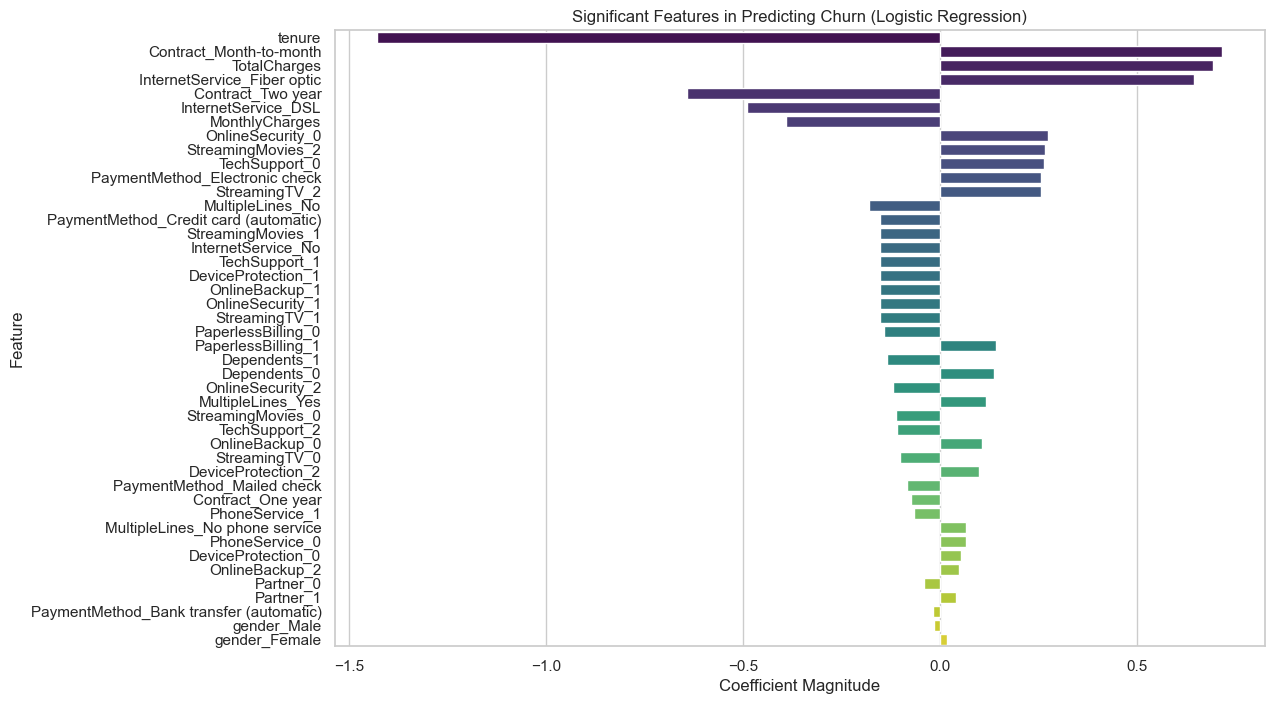

In [28]:
# Getting feature names from preprocessor
numeric_features += list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
feature_names = numeric_features

# Extracting coefficients from the best logistic regression model
coefficients = best_logistic_regression_model.named_steps['classifier'].coef_[0]

# Creating a DataFrame to associate feature names with coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sorting coefficients by absolute value for better visualization
coefficients_df['AbsoluteCoefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='AbsoluteCoefficient', ascending=False)

# Plotting the significant features
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette='viridis')
plt.title('Significant Features in Predicting Churn (Logistic Regression)')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.show()

the top five features with the highest coefficient magnitudes, namely tenure, Contract_Month-to-Month, TotalCharges, InternetService_Fiber optic, and Contract_Two Year, indicate their significant impact on predicting customer churn. In simpler terms, higher values of these features are associated with increased likelihoods of churn, emphasizing their importance in understanding and anticipating customer behavior in the context of subscription contracts, service tenure, and the type of internet service

# Summary

## Model Selection and Feature Significance

**1. Data Exploration and Preprocessing:**
   - Explored the dataset, identified missing values, and performed necessary preprocessing steps.
   - Handled null values and encoded categorical variables.

**2. Initial Model Evaluation:**
   - Conducted exploratory data analysis and created visualizations.
   - Implemented basic models (e.g., logistic regression) to establish a baseline.

**3. Feature Engineering and Model Improvement:**
   - Engineered features and transformed the dataset.
   - Explored numerical and categorical features to identify patterns.

**4. Model Selection:**
   - Explored multiple models, including logistic regression, KNN, SVM, Random Forest, and XGBoost.
   - Utilized hyperparameter tuning and cross-validation.

**5. Evaluation Metrics:**
   - Evaluated models based on accuracy, precision, recall, and F1 score.
   - Considered trade-offs between metrics and selected logistic regression.

**6. Significant Features Visualization:**
   - Visualized significant features using logistic regression.
   - Identified top five features with the highest coefficient magnitudes (tenure, Contract_Month-to-Month, TotalCharges, 
     InternetService_Fiber optic, and Contract_Two Year).

**7. Interpretation of Features:**
   - Interpreted coefficients, understanding the impact on the likelihood of customer churn.
   - Noted higher values associated with increased probabilities of churn.

**8. Conclusion:**
   - Considering accuracy, recall, simplicity, and interpretability, selected logistic regression.
   - Aligned with the business goal of accurately predicting customer churn.
   - Logistic regression provides balanced performance, empowering businesses with actionable insights.
   - Emphasized the significance of identified features in understanding customer behavior.

